In [17]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from xgboost import XGBClassifier
import collections


# Other Libraries
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
import warnings

import xgboost as xgb
from bayes_opt import BayesianOptimization
import os
import ast 
from itertools import chain
import cv2

warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv('/Users/ipsitapraharaj/Desktop/Paypal/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [20]:
# No Null Values!
df.isnull().sum().max()

0

In [21]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [22]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

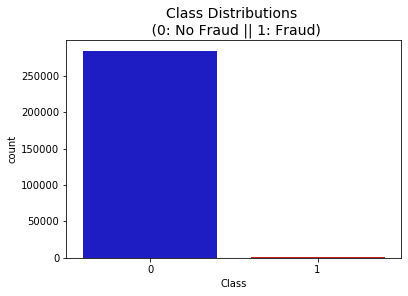

In [23]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

#### 1 is fraud , 0 is no-fraud

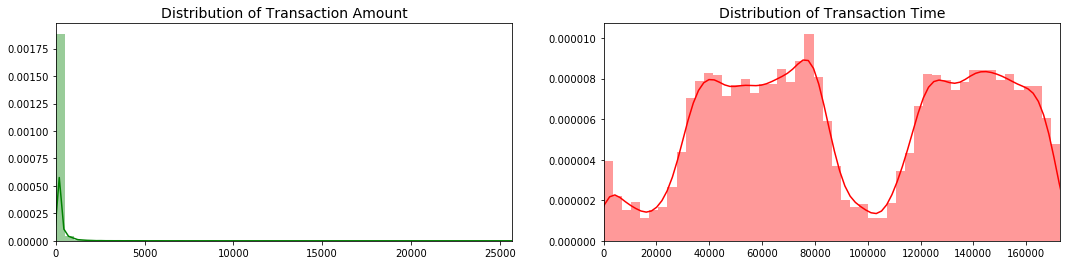

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='g')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

#### Standardization

In [25]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Test-train split before treating the imbalance in data

In [158]:


print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Check the Distribution of the labels
X = original_Xtrain
y = original_ytrain
df = pd.concat([X,y],axis=1,sort= False)
test_df = pd.concat([original_Xtest,original_ytest],axis=1,sort= False)

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 25633  25634  25635 ... 256324 256325 256326] Test: [    0     1     2 ... 25630 25631 25632]
Train: [     0      1      2 ... 256324 256325 256326] Test: [25633 25634 25635 ... 56101 56992 57057]
Train: [     0      1      2 ... 256324 256325 256326] Test: [51258 51259 51260 ... 82062 82318 82618]
Train: [     0      1      2 ... 256324 256325 256326] Test: [ 76886  76887  76888 ... 111720 112020 112724]
Train: [     0      1      2 ... 256324 256325 256326] Test: [102512 102513 102514 ... 134921 135620 135841]
Train: [     0      1      2 ... 256324 256325 256326] Test: [128150 128151 128152 ... 157923 158494 158507]
Train: [     0      1      2 ... 256324 256325 256326] Test: [153786 153787 153788 ... 179435 179436 179437]
Train: [     0      1      2 ... 256324 256325 256326] Test: [177215 177466 177818 ... 205069 205070 205071]
Train: [     0      1      2 ... 256324 256325 256326] Test: [199212 199786 200335 .

In [187]:
test_df.to_csv('/Users/ipsitapraharaj/Desktop/Paypal/orig_test_df.csv',index=False)

### RUS (Undersampling)

In [160]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
243091,0.041920,0.788261,-0.590954,0.330715,1.604928,-0.662153,-0.208593,-0.068966,0.139624,0.209434,...,-0.167569,0.312036,0.909197,-0.188881,0.003066,-0.479673,0.508707,-0.017531,0.164344,0
15526,0.067771,-0.678767,1.339323,-0.423713,0.333266,-0.713693,-0.901949,-0.944845,-0.373821,-0.217912,...,0.168971,0.298513,0.775905,-0.127281,0.599066,0.602187,-0.151497,-0.005772,0.007273,0
118342,1.369384,-0.113371,-0.577226,-0.857807,2.105875,-1.488866,-1.133556,1.274903,-0.535839,0.638276,...,0.116259,0.409728,1.213008,0.262926,-0.266376,-0.785057,-0.382041,0.217176,0.184480,0
169389,-0.212674,0.410989,-0.287323,0.904186,-0.180970,0.381785,1.169155,-1.034365,1.564545,-0.626712,...,-0.388682,0.074830,0.487278,-0.169766,-0.105332,0.162410,-0.615348,-0.475121,-0.206677,0
140786,-0.293440,-0.008905,-0.433222,2.428379,-3.996454,4.871299,-1.796308,-0.586868,-4.654543,1.285230,...,0.745029,0.713559,-0.408954,-0.320890,-0.804230,0.962852,0.199558,1.094533,0.541148,1


Distribution of the Classes in the subsample dataset
0    0.552189
1    0.447811
Name: Class, dtype: float64


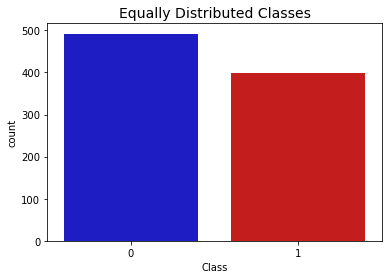

values in each =  445


In [161]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()
print('values in each = ', int(len(new_df)/2))

### ADASYN (Adaptive Oversampling)

Distribution of the Classes in the oversample dataset
0    0.833424
1    0.166576
Name: Class, dtype: float64


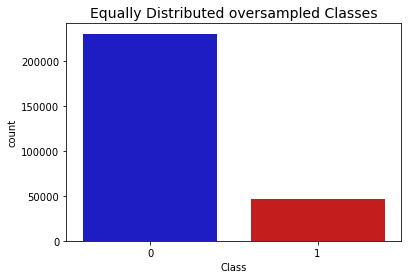

values in each =  138162


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.111786,0.410085,2.312637,-1.614549,-1.543856,-1.899409,-0.766975,0.203935,-1.309992,0.132637,...,-0.498073,-0.212869,-0.305388,0.136209,-0.434857,-0.124218,-0.141077,-0.020164,-0.068036,0
1,1.089918,-0.459251,0.962247,-0.325886,1.230372,1.149851,-0.955346,0.266138,-0.708429,0.233452,...,0.114587,0.339463,0.804765,-0.204049,0.027361,0.349965,-0.246153,0.054991,0.046633,0
2,-0.286453,0.946945,0.077317,1.238793,-1.119563,-0.522172,0.784001,-1.017249,0.649483,0.142735,...,-0.192884,0.325843,0.922738,-0.043604,0.651439,-0.626108,0.478892,-0.043428,0.058337,0
3,1.158387,0.407336,-0.499956,0.604819,0.518800,-1.011903,0.675581,-0.899934,1.599638,-0.386603,...,0.039955,0.000954,0.050026,0.039164,-0.189465,-0.374536,-0.068416,-0.077982,-0.021508,0
4,1.089918,0.906225,-0.028035,-0.431674,-0.180699,-2.755011,-0.768331,-0.535306,-1.024295,-2.885269,...,0.367941,-1.482187,-0.201508,-0.107510,-0.039589,0.762580,-0.351440,0.029885,0.239554,0


In [162]:
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE

ada = ADASYN(
    sampling_strategy=0.2,
    random_state=None,
    n_neighbors=5,
    n_jobs=100)
X_resampled, y_resampled = ada.fit_sample(df.iloc[:,:-1], df['Class'])

data_oversampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
data_oversampled.columns = df.columns

print('Distribution of the Classes in the oversample dataset')
print(data_oversampled['Class'].value_counts()/len(data_oversampled))

sns.countplot('Class', data=data_oversampled, palette=colors)
plt.title('Equally Distributed oversampled Classes', fontsize=14)
plt.show()
print('values in each = ', int(len(data_oversampled)/2))
 
data_oversampled.head()

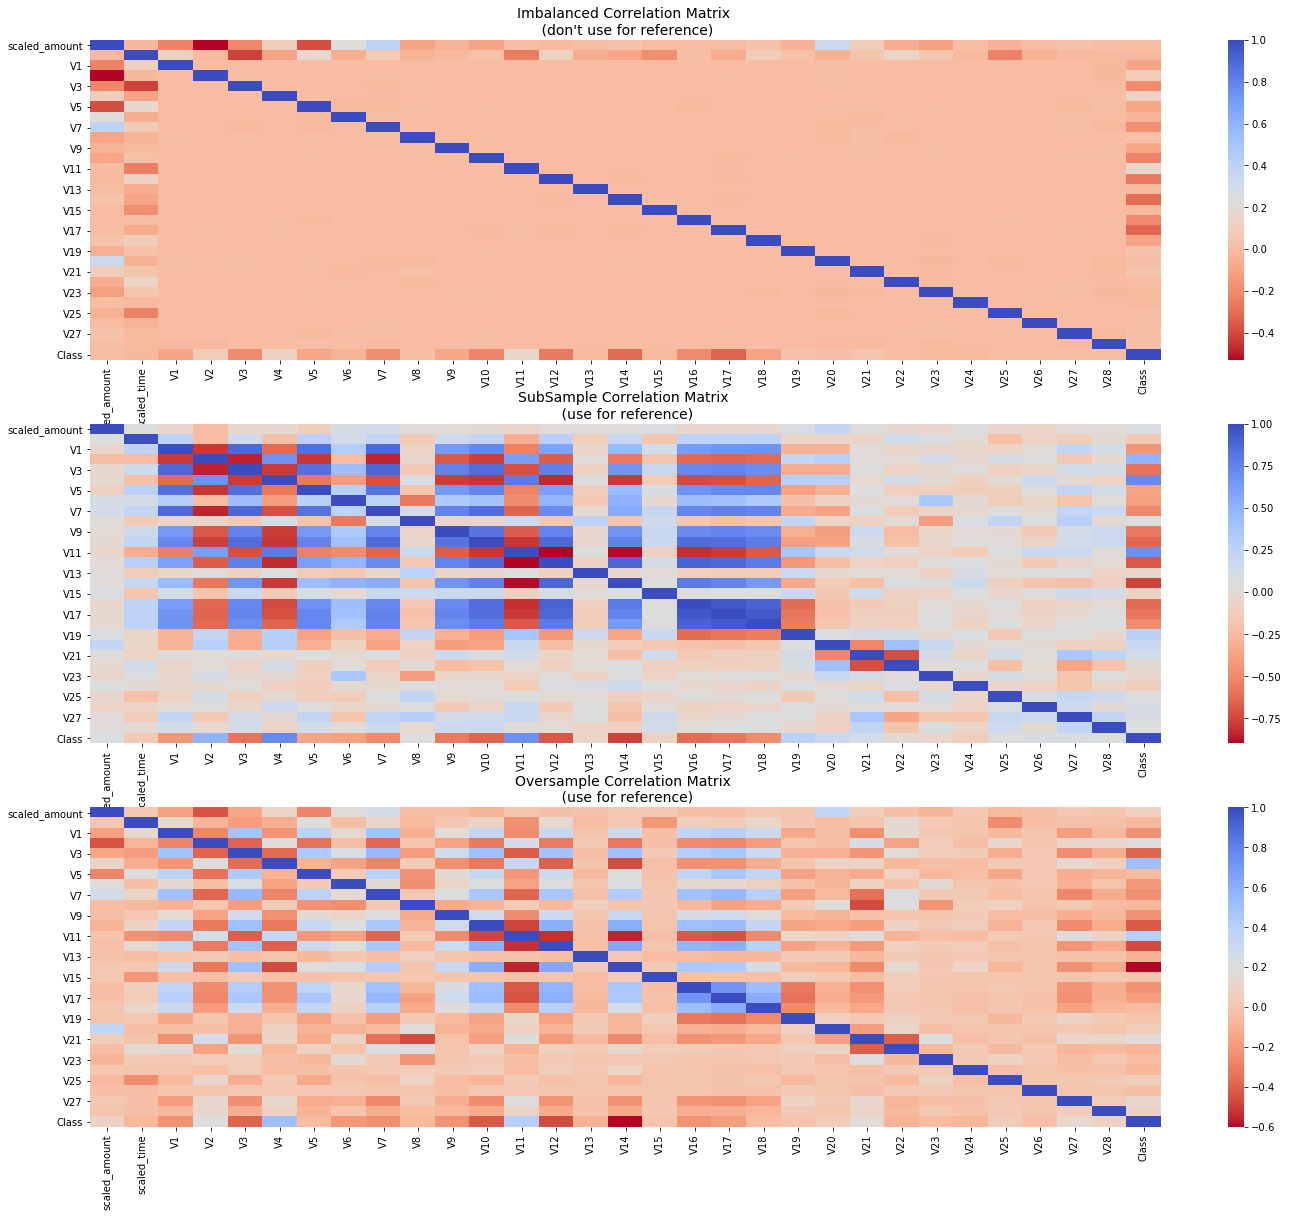

In [163]:
# Make sure we use the subsample in our correlation
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('\nSubSample Correlation Matrix \n (use for reference)', fontsize=14)

over_sample_corr = data_oversampled.corr()
sns.heatmap(over_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax3)
ax3.set_title('\nOversample Correlation Matrix \n (use for reference)', fontsize=14)

plt.show()


### RUS Correlated variables

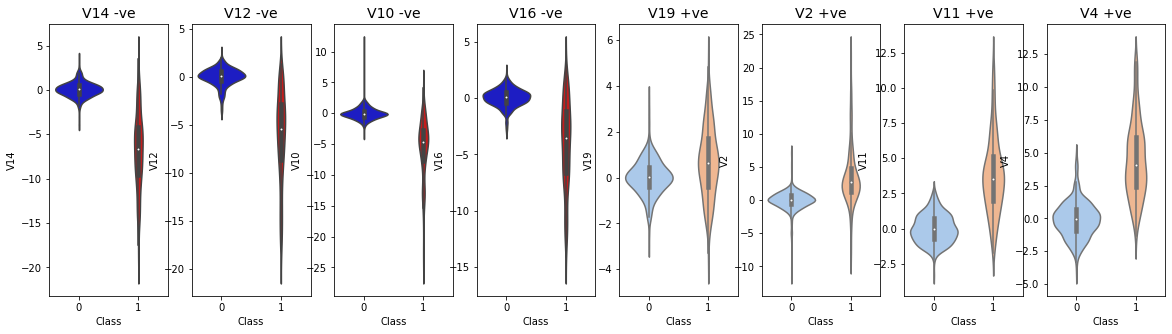

In [164]:
f, axes = plt.subplots(ncols=8 ,figsize=(20,5))
k=0
for i in sub_sample_corr['Class'].sort_values()[:4]:
    column = sub_sample_corr['Class'].index[sub_sample_corr['Class'].values==i][0]
    sns.violinplot(x="Class", y=column, data=new_df, palette=colors, ax=axes[k])
    axes[k].set_title( str(column)+' -ve', fontsize=14)
    k= k+1
    
for i in sub_sample_corr['Class'].sort_values()[-5:-1]:
    column = sub_sample_corr['Class'].index[sub_sample_corr['Class'].values==i][0]
    sns.violinplot(x="Class", y=column, data=new_df, palette="pastel", ax=axes[k])
    axes[k].set_title( str(column)+' +ve', fontsize=14)
    k= k+1   
    

### Anomaly Detection: RUS post 

Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.  V14 is the only feature that has a Gaussian distribution compared to features V16 and V12.<br><br>

<ul>
<li> <b>Interquartile Range (IQR): </b> We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.  </li>
<li> <b>Boxplots: </b> Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme). </li>
</ul>

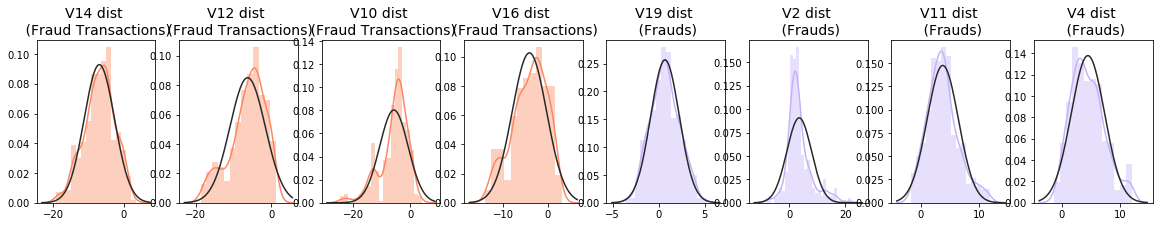

In [165]:
from scipy.stats import norm
f, ax = plt.subplots(1,8, figsize=(20, 3))
k=0
for i in sub_sample_corr['Class'].sort_values()[:4]:
    column = sub_sample_corr['Class'].index[sub_sample_corr['Class'].values==i][0]
    sns.distplot(new_df[(column)].loc[new_df['Class'] == 1].values,ax=ax[k], fit=norm, color='#FB8861')
    ax[k].set_title(str(column)+' dist \n (Fraud Transactions)', fontsize=14)
    k= k+1
    
for i in sub_sample_corr['Class'].sort_values()[-5:-1]:
    column = sub_sample_corr['Class'].index[sub_sample_corr['Class'].values==i][0]
    sns.distplot(new_df[(column)].loc[new_df['Class'] == 1].values,ax=ax[k], fit=norm, color='#C5B3F9')
    ax[k].set_title(str(column)+' dist \n (Frauds)', fontsize=14)
    k= k+1

In [166]:
# # ----->Removing Outliers
new_df1 = new_df
gauslist = ['V14','V16','V4']
for i in gauslist:
    fraud = new_df1[i].loc[new_df1['Class'] == 1].values
    q25, q75 = np.percentile(fraud, 25), np.percentile(fraud, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = [x for x in fraud if x < lower or x > upper]
    new_df1 = new_df1.drop(new_df1[(new_df1[i] > upper) | (new_df1[i] < lower)].index)

    print('\nQuartile 25: {} | Quartile 75: {}'.format(round(q25,2), round(q75,2)),"\n")
    print(str(i)+' Lower: {}'.format(round(lower,2)))
    print(str(i)+' Upper: {}'.format(round(upper,2)))
    print('\nFeature '+str(i)+' Outliers for Fraud Cases: {}'.format(len(outliers)))
    print('Number of Instances after outliers removal: {}'.format(len(new_df1)))
    print('----' * 20)


Quartile 25: -9.53 | Quartile 75: -4.2 

V14 Lower: -17.53
V14 Upper: 3.8

Feature V14 Outliers for Fraud Cases: 6
Number of Instances after outliers removal: 885
--------------------------------------------------------------------------------

Quartile 25: -6.55 | Quartile 75: -1.07 

V16 Lower: -14.78
V16 Upper: 7.15

Feature V16 Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 885
--------------------------------------------------------------------------------

Quartile 25: 2.34 | Quartile 75: 6.17 

V4 Lower: -3.42
V4 Upper: 11.93

Feature V4 Outliers for Fraud Cases: 1
Number of Instances after outliers removal: 882
--------------------------------------------------------------------------------


In [167]:
new_df1.to_csv('/Users/ipsitapraharaj/Desktop/Paypal/new_df1.csv',index=False)

#### RUS after removal of outliers

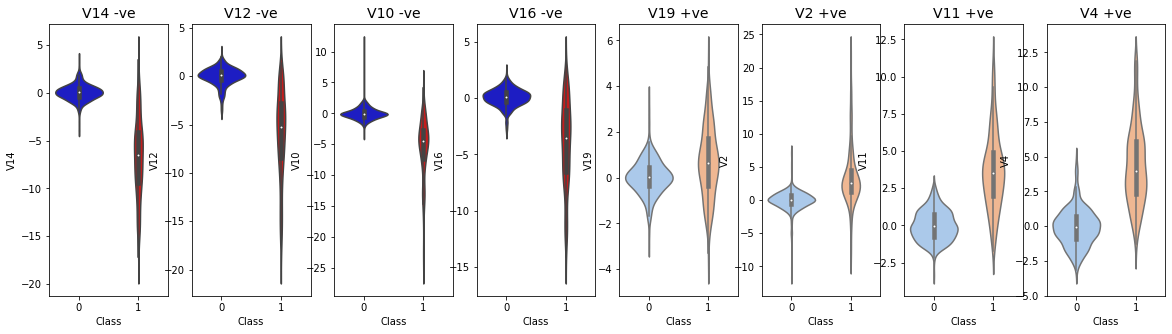

In [168]:
sub_sample_corr = new_df1.corr()
f, axes = plt.subplots(ncols=8 ,figsize=(20,5))
k=0
for i in sub_sample_corr['Class'].sort_values()[:4]:
    column = sub_sample_corr['Class'].index[sub_sample_corr['Class'].values==i][0]
    sns.violinplot(x="Class", y=column, data=new_df1, palette=colors, ax=axes[k])
    axes[k].set_title( str(column)+' -ve', fontsize=14)
    k= k+1
    
for i in sub_sample_corr['Class'].sort_values()[-5:-1]:
    column = sub_sample_corr['Class'].index[sub_sample_corr['Class'].values==i][0]
    sns.violinplot(x="Class", y=column, data=new_df1, palette="pastel", ax=axes[k])
    axes[k].set_title( str(column)+' +ve', fontsize=14)
    k= k+1   
    

### Anomaly Detection: ADASYN

V4 is the only feature that is most similar to a Gaussian distribution compared to features V11 and V14.<br><br>


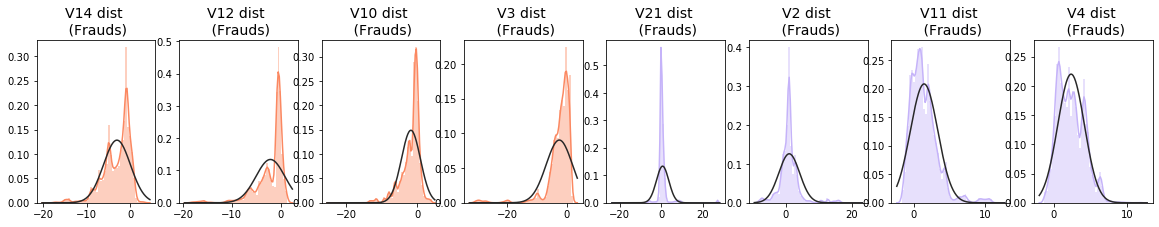

In [169]:
f, ax = plt.subplots(1,8, figsize=(20, 3))
k=0
for i in over_sample_corr['Class'].sort_values()[:4]:
    column = over_sample_corr['Class'].index[over_sample_corr['Class'].values==i][0]
    sns.distplot(data_oversampled[(column)].loc[data_oversampled['Class'] == 1].values,ax=ax[k], fit=norm, color='#FB8861')
    ax[k].set_title(str(column)+' dist \n (Frauds)', fontsize=14)
    k= k+1
    
for i in over_sample_corr['Class'].sort_values()[-5:-1]:
    column = over_sample_corr['Class'].index[over_sample_corr['Class'].values==i][0]
    sns.distplot(data_oversampled[(column)].loc[data_oversampled['Class'] == 1].values,ax=ax[k], fit=norm, color='#C5B3F9')
    ax[k].set_title(str(column)+' dist \n (Frauds)', fontsize=14)
    k= k+1

In [170]:
# # ----->Removing Outliers
new_df2 = data_oversampled
gauslist = ['V4','V11','V14','V10','V12','V21']
for i in gauslist:
    fraud = new_df2[i].loc[new_df2['Class'] == 1].values
    q25, q75 = np.percentile(fraud, 25), np.percentile(fraud, 75)
    iqr = q75 - q25
    cut_off = iqr*(.4) 
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = [x for x in fraud if x < lower or x > upper]
    new_df2 = new_df2.drop(new_df2[(new_df2[i] > upper) | (new_df2[i] < lower)].index)

    print('\nQuartile 25: {} | Quartile 75: {}'.format(round(q25,2), round(q75,2)),"\n")
#     print(str(i)+' Lower: {}'.format(round(lower,2)))
#     print(str(i)+' Upper: {}'.format(round(upper,2)))
    print('\nFeature '+str(i)+' Outliers for Fraud Cases: {}'.format(len(outliers)))
    print('Number of Instances after outliers removal: {}'.format(len(new_df2)))
    print('----' * 20)


Quartile 25: 0.86 | Quartile 75: 3.84 


Feature V4 Outliers for Fraud Cases: 4995
Number of Instances after outliers removal: 174549
--------------------------------------------------------------------------------

Quartile 25: 0.06 | Quartile 75: 2.18 


Feature V11 Outliers for Fraud Cases: 7696
Number of Instances after outliers removal: 134102
--------------------------------------------------------------------------------

Quartile 25: -4.46 | Quartile 75: -0.78 


Feature V14 Outliers for Fraud Cases: 3845
Number of Instances after outliers removal: 108724
--------------------------------------------------------------------------------

Quartile 25: -2.0 | Quartile 75: -0.1 


Feature V10 Outliers for Fraud Cases: 6451
Number of Instances after outliers removal: 92976
--------------------------------------------------------------------------------

Quartile 25: -0.8 | Quartile 75: -0.04 


Feature V12 Outliers for Fraud Cases: 6732
Number of Instances after outliers removal: 39

In [171]:
new_df2.to_csv('/Users/ipsitapraharaj/Desktop/Paypal/new_df2.csv',index=False)

#### ADASYN after outlier removal

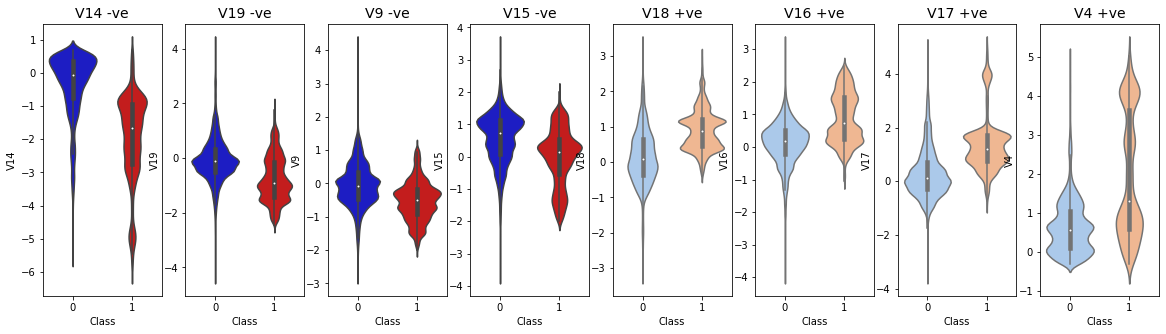

In [172]:
over_sample_corr = new_df2.corr()
f, axes = plt.subplots(ncols=8 ,figsize=(20,5))
k=0
for i in over_sample_corr['Class'].sort_values()[:4]:
    column = over_sample_corr['Class'].index[over_sample_corr['Class'].values==i][0]
    sns.violinplot(x="Class", y=column, data=new_df2, palette=colors, ax=axes[k])
    axes[k].set_title( str(column)+' -ve', fontsize=14)
    k= k+1
    
for i in over_sample_corr['Class'].sort_values()[-5:-1]:
    column = over_sample_corr['Class'].index[over_sample_corr['Class'].values==i][0]
    sns.violinplot(x="Class", y=column, data=new_df2, palette="pastel", ax=axes[k])
    axes[k].set_title( str(column)+' +ve', fontsize=14)
    k= k+1   

### Visualization - Dimensionality reduction (RUS shown)
<ul>
<li>t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset. </li>
<li> This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases. </li>

T-SNE took 1.1e+01 s
PCA took 0.0083 s
Truncated SVD took 0.0058 s


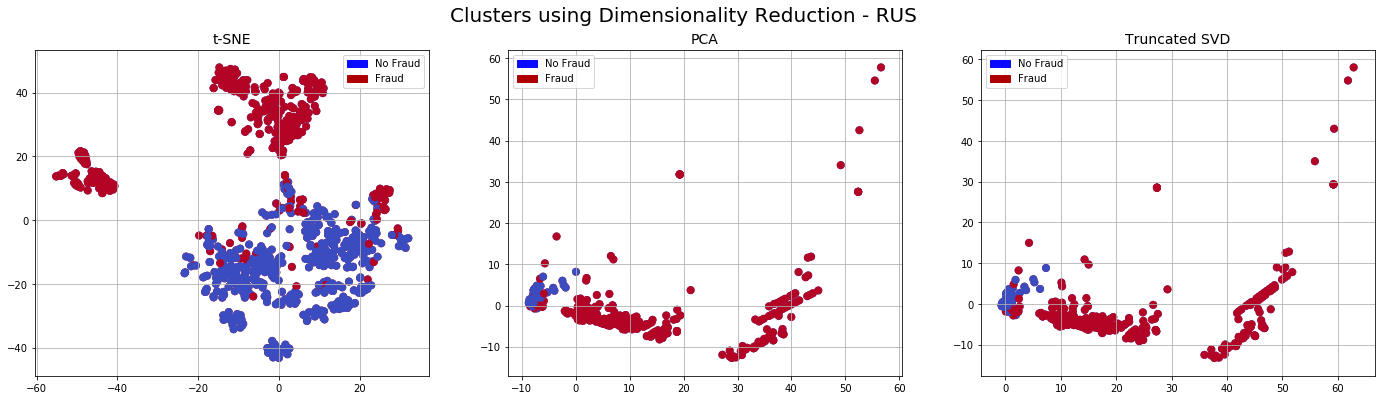

In [173]:
# New_df1 is from the random undersample data w/o outliers (fewer instances)

X = new_df1.drop('Class', axis=1)
y = new_df1['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction - RUS', fontsize=20)
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

